In [67]:
import os
import sys
sys.path.append('../')
import numpy as np
import json
import matplotlib.pyplot as plt
from utils.utils_plot import get_label, get_color

%matplotlib inline

In [68]:
methods = {'No_Deconv':('--', 1, 5.5),
           'FPFS':('-', 1, 5.5),
        #    'Wiener':('-', 1, 5.5),
         #   'Richard-Lucy(10)':('-', 0.7, 2.5), 'Richard-Lucy(20)':('-', 0.8, 3.5),
         #   'Richard-Lucy(30)':('-', 0.9, 4.5), 'Richard-Lucy(50)':('-', 1, 5), 
           'Richard-Lucy(100)':('-', 1, 5),
           'Tikhonet_Laplacian':('-', 1, 5.5), 'ShapeNet':('-', 1, 5.5),
          #  'Unrolled_ADMM_Gaussian(2)':('-', 0.7, 2.5), 'Unrolled_ADMM_Gaussian(4)':('-', 0.85, 4), 
           'Unrolled_ADMM_Gaussian(8)':('-', 1, 5.5)
           }
shear_errs = [0, 0.001, 0.002, 0.003, 0.005, 0.007, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2]
fwhm_errs = [0, 0.001, 0.002, 0.003, 0.005, 0.007, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2]
results_path = '../results/'

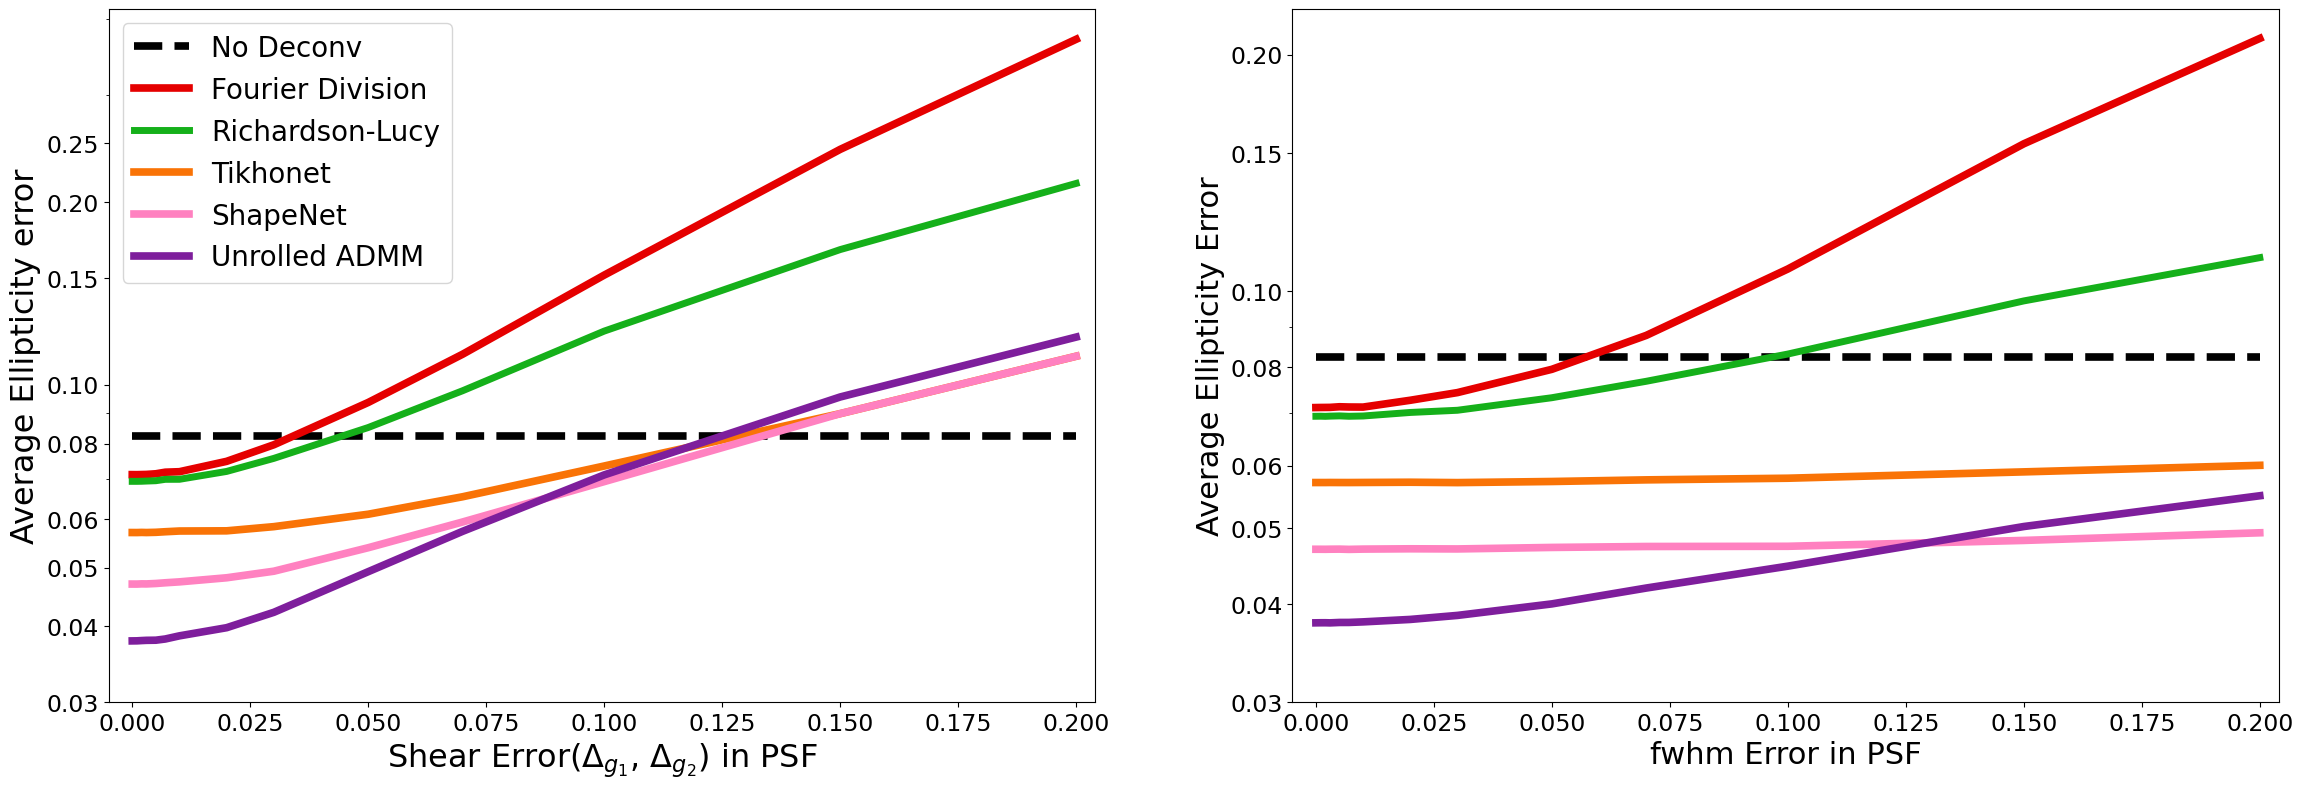

In [72]:
fig = plt.figure(figsize=(28,9), facecolor='white') 

# Load in ground truth.
gt_shear = {}
results_file = os.path.join(results_path, 'No_Deconv', f'results_psf_shear_err.json')
with open(results_file, 'r') as f:
    results = json.load(f)
for shear_err in shear_errs:
    gt_shear[str(shear_err)] = results[str(shear_err)]['gt_shear']
    
ax1 = plt.subplot(1,2,1)
for method in methods:
    results_file = os.path.join(results_path, method, f'results_psf_shear_err.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
        
    g_errs, g_stds = [], []
    for shear_err in shear_errs:
        rec_shear = np.array(results[str(shear_err)]['rec_shear'])
        rec_err = np.abs(rec_shear - gt_shear[str(shear_err)])
        rec_err = np.minimum(rec_err, np.ones_like(rec_err))
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2])/20)
    g_errs, g_stds = np.array(g_errs), np.array(g_stds)
    
    color = get_color(method)
    if methods[method][1] == 1:
        label = get_label(method)
        ax1.plot(shear_errs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][2], alpha=methods[method][1])
    else:
        ax1.plot(shear_errs, g_errs, methods[method][0], color=color, linewidth=methods[method][2], alpha=methods[method][1])
    # ax1.fill_between(shear_errs, g_errs-g_stds,g_errs+g_stds,color=color,alpha=.2)
    
ax1.set_xlim([-0.005, 0.204])
ax1.set_xlabel('Shear Error($\Delta_{g_1}$, $\Delta_{g_2}$) in PSF', fontsize=23)
ax1.set_yscale('log')
# ax1.set_ylim([0.055,0.48])
ax1.set_yticks([0.03,0.04,0.05,0.06,0.08,0.1,0.15,0.2,0.25,0.3,0.35])
ax1.set_yticklabels(['0.03','0.04','0.05','0.06','0.08','0.10','0.15','0.20','0.25','0.30','0.35'])
ax1.set_ylabel('Average Ellipticity error', fontsize=23)
ax1.legend(fontsize=20, loc='upper left')
ax1.tick_params(labelsize=17)


gt_shear = {}
results_file = os.path.join(results_path, 'No_Deconv', f'results_psf_fwhm_err.json')
with open(results_file, 'r') as f:
    results = json.load(f)
for shear_err in shear_errs:
    gt_shear[str(shear_err)] = results[str(shear_err)]['gt_shear']

ax1 = plt.subplot(1,2,2)
for method in methods:
    results_file = os.path.join(results_path, method, f'results_psf_fwhm_err.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
        
    g_errs, g_stds = [], []
    for fwhm_err in fwhm_errs:
        rec_shear = np.array(results[str(fwhm_err)]['rec_shear'])
        rec_err = np.abs(rec_shear - gt_shear[str(fwhm_err)])
        rec_err = np.minimum(rec_err, np.ones_like(rec_err))
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2])/20)
    g_errs, g_stds = np.array(g_errs), np.array(g_stds)

    color = get_color(method)
    if methods[method][1] == 1:
        label = get_label(method)
        ax1.plot(fwhm_errs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][2], alpha=methods[method][1])
    else:
        ax1.plot(fwhm_errs, g_errs, methods[method][0], color=color, linewidth=methods[method][2], alpha=methods[method][1])
    # ax1.fill_between(fwhm_errs, g_errs-g_stds,g_errs+g_stds,color=color,alpha=.2)

ax1.set_xlim([-0.005, 0.204])
ax1.set_xlabel('fwhm Error in PSF', fontsize=22)
ax1.set_yscale('log')
# ax1.set_ylim([0.055,0.32])
ax1.set_yticks([0.03,0.04,0.05,0.06,0.08,0.1,0.15,0.2])
ax1.set_yticklabels(['0.03','0.04','0.05','0.06','0.08','0.10','0.15','0.20'])
ax1.set_ylabel('Average Ellipticity Error', fontsize=22)
ax1.tick_params(labelsize=17) 

# plt.savefig('psf_err.jpg', bbox_inches='tight')

In [70]:
# methods = {'No_Deconv':('--', 1, 5.5), #.o
#            'FPFS':('-', 1, 5.5),#^
#            'Richard-Lucy(10)':('-', 0.7, 2.5), 'Richard-Lucy(20)':('-', 0.8, 3.5), # D
#            'Richard-Lucy(30)':('-', 0.9, 4.5), 'Richard-Lucy(50)':('-', 1, 5), 
#           #  'Richard-Lucy(100):'--D',
#            'Unrolled_ADMM(1)':('-', 0.7, 2.5), 'Unrolled_ADMM(2)':('-', 0.8, 3.5), # *
#            'Unrolled_ADMM(4)':('-', 0.9, 4.5), 'Unrolled_ADMM(8)':('-', 1, 5.5)}
# shear_errs=[0, 0.01, 0.02, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
# fwhm_errs=[0, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

In [71]:
# fig = plt.figure(figsize=(28,9), facecolor='white') 

# ax1 = plt.subplot(1,2,1)
# for method in methods:
#     results_path = '../results1/'# if 'ADMM' in method else '../results/'
#     results_file = os.path.join(results_path, method, f'results_psf_shear_err.json')
#     with open(results_file, 'r') as f:
#         results = json.load(f)
#     if method == 'No_Deconv':
#         gt_shear = np.array(results['0']['gt_shear'])
        
#     g_errs, g_stds = [], []
#     for shear_err in shear_errs:
#         rec_err = np.abs(np.array(results[str(shear_err)]['rec_shear']) - gt_shear)
#         g_errs.append(np.mean(rec_err[:,2]))
#         g_stds.append(np.std(rec_err[:,2])/20)
#     g_errs, g_stds = np.array(g_errs), np.array(g_stds)
    
#     color = get_color(method)
#     markersize = 11.7 if 'ADMM' in method else (6.5 if 'Richard-Lucy' in method else (9 if method == 'FPFS' else 7))
#     if methods[method][1] == 1:
#         label = get_label(method)
#         ax1.plot(shear_errs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][2], alpha=methods[method][1], markersize=markersize)
#     else:
#         ax1.plot(shear_errs, g_errs, methods[method][0], color=color, linewidth=methods[method][2], alpha=methods[method][1], markersize=markersize)
#     # ax1.fill_between(shear_errs, g_errs-g_stds,g_errs+g_stds,color=color,alpha=.2)
    
# ax1.set_xlim([-0.01, 0.41])
# ax1.set_xlabel('Shear Error($\Delta_{g_1}$, $\Delta_{g_2}$) in PSF', fontsize=23)
# ax1.set_yscale('log')
# ax1.set_ylim([0.025,0.65])
# ax1.set_yticks([0.03,0.04,0.05,0.07,0.1,0.15,0.2,0.3,0.4,0.5,0.6])
# ax1.set_yticklabels(['0.03','0.04','0.05','0.07','0.10','0.15','0.20','0.30','0.40','0.50','0.60'])
# ax1.set_ylabel('Average Ellipticity error', fontsize=23)
# # ax1.legend(fontsize=17)
# ax1.tick_params(labelsize=17)


# ax1 = plt.subplot(1,2,2)
# for method in methods:
#     result_path = '../results1/' #if 'ADMM' in method else '../results/'
#     results_file = os.path.join(result_path, method, 'results_psf_fwhm_err.json')
#     with open(results_file, 'r') as f:
#         results = json.load(f)
#     if method == 'No_Deconv':
#         gt_shear = np.array(results['0']['gt_shear'])
        
#     g_errs, g_stds = [], []
#     for fwhm_err in fwhm_errs:
#         rec_err = np.abs(np.array(results[str(fwhm_err)]['rec_shear']) - gt_shear)
#         g_errs.append(np.mean(rec_err[:,2]))
#         g_stds.append(np.std(rec_err[:,2])/20)
#     g_errs, g_stds = np.array(g_errs), np.array(g_stds)

#     color = get_color(method)
#     markersize = 11.7 if 'ADMM' in method else (6.5 if 'Richard-Lucy' in method else (9 if method == 'FPFS' else 7))
#     if methods[method][1] == 1:
#         label = get_label(method)
#         ax1.plot(fwhm_errs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][2], alpha=methods[method][1], markersize=markersize)
#     else:
#         ax1.plot(fwhm_errs, g_errs, methods[method][0], color=color, linewidth=methods[method][2], alpha=methods[method][1], markersize=markersize)
#     # ax1.fill_between(fwhm_errs, g_errs-g_stds,g_errs+g_stds,color=color,alpha=.2)

# ax1.set_xlim([-0.01, 0.41])
# ax1.set_xlabel('fwhm Error in PSF', fontsize=22)
# ax1.set_yscale('log')
# ax1.set_ylim([0.025,0.65])
# ax1.set_yticks([0.03,0.04,0.05,0.07,0.1,0.15,0.2,0.3,0.4,0.5,0.6])
# ax1.set_yticklabels(['0.03','0.04','0.05','0.07','0.10','0.15','0.20','0.30','0.40','0.50','0.60'])
# ax1.set_ylabel('Average Ellipticity Error', fontsize=22)
# ax1.legend(fontsize=20, loc='upper right')
# ax1.tick_params(labelsize=17) 

# plt.savefig('psf_err.jpg', bbox_inches='tight')